Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Load Dataset

In [3]:
df= pd.read_csv("LoanApprovalPrediction.csv")

Initial Data Inspection

In [4]:
df.shape

(598, 13)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [7]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


Missing Value Analysis

In [8]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14


In [9]:
df.isnull().sum() / len(df) * 100

,0
Loan_ID,0.000000
Gender,0.000000
Married,0.000000
Dependents,2.006689
Education,0.000000
Self_Employed,0.000000
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.511706
Loan_Amount_Term,2.341137


Categorical Feature Analysis vs Target

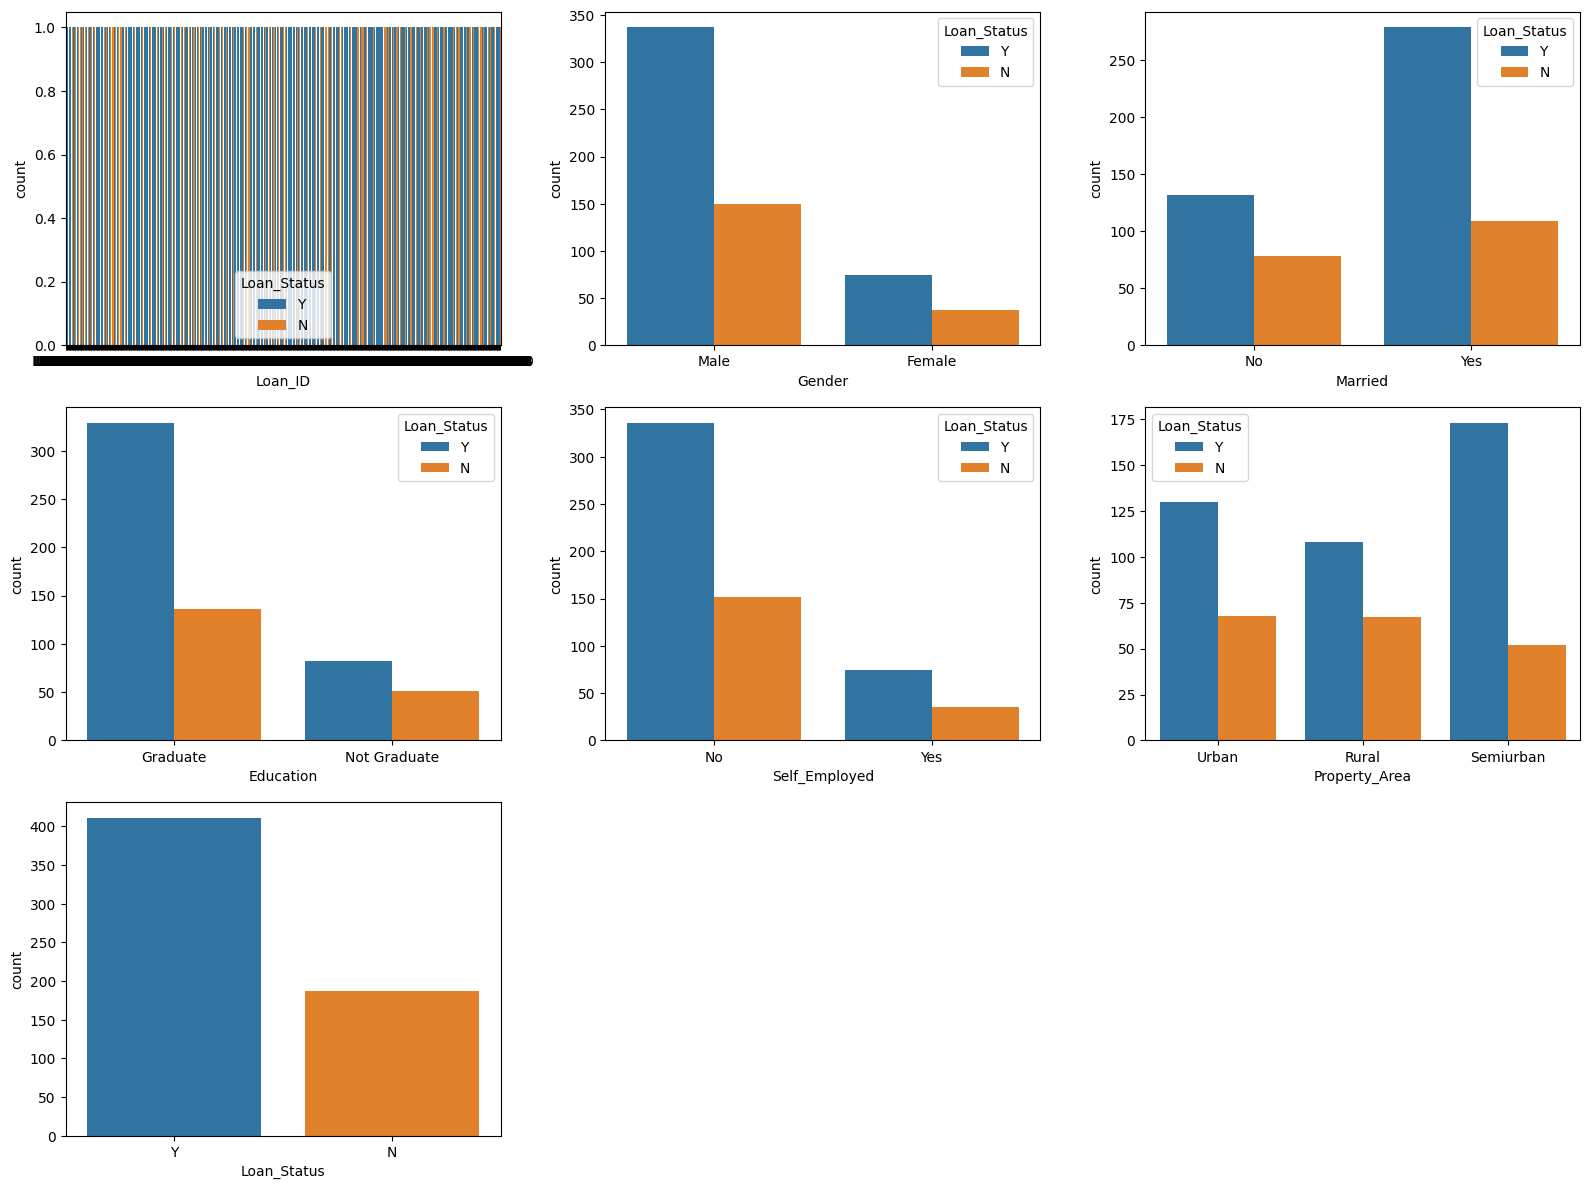

In [10]:
cat_cols = df.select_dtypes(include='object')

plt.figure(figsize=(16,12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3,3,i)
    sns.countplot(x=col, hue='Loan_Status', data=df)

plt.tight_layout()
plt.show()


Target Variable Distribution

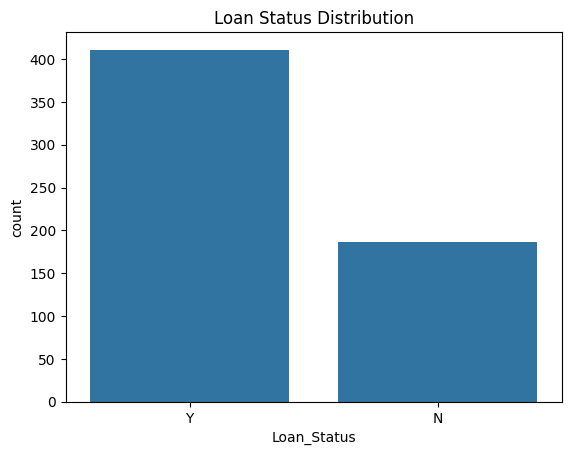

In [11]:
sns.countplot(x="Loan_Status", data=df)
plt.title("Loan Status Distribution")
plt.show()


Numerical Feature Distribution

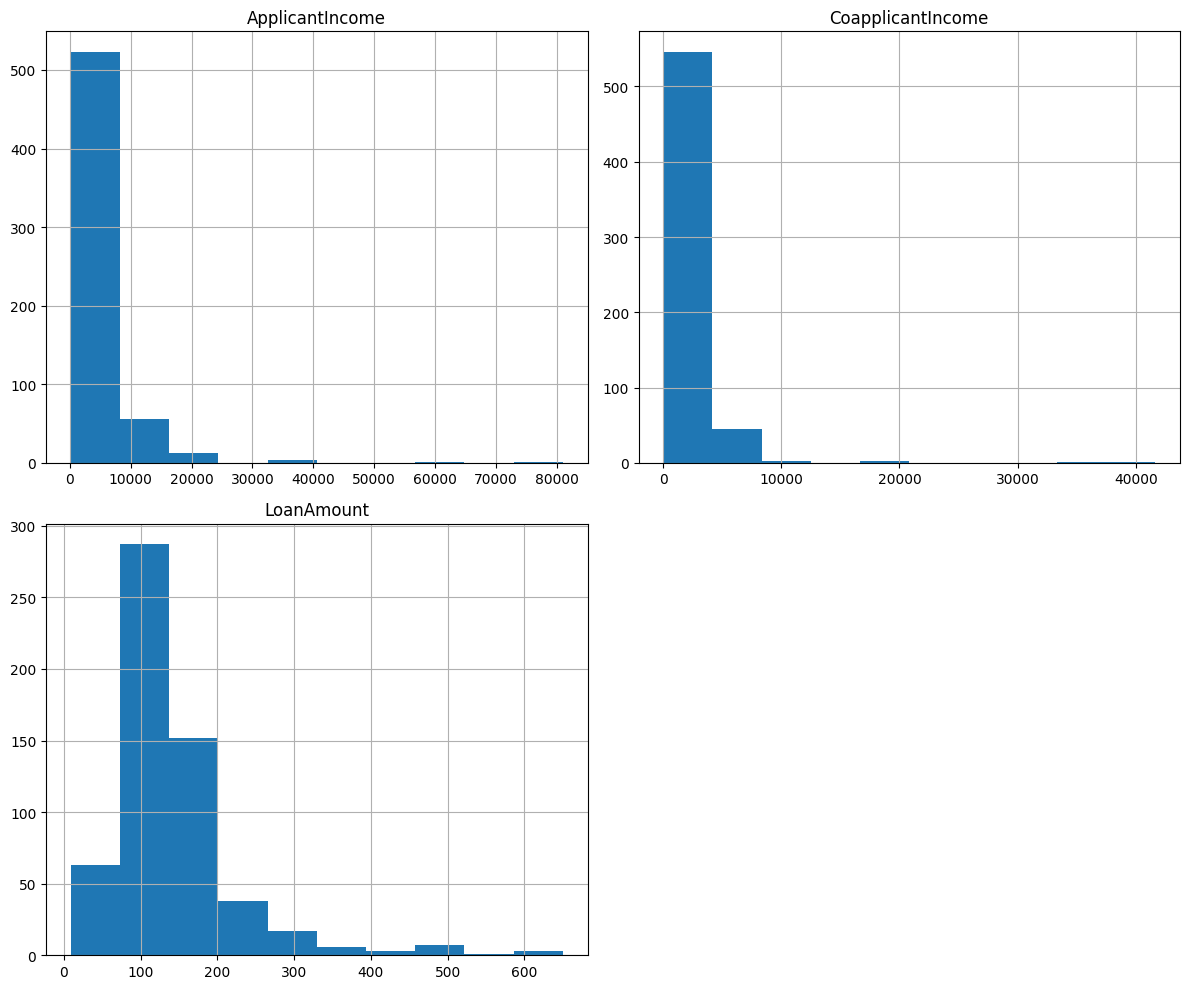

In [12]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

df[num_cols].hist(figsize=(12,10))
plt.tight_layout()
plt.show()


Correlation Analysis

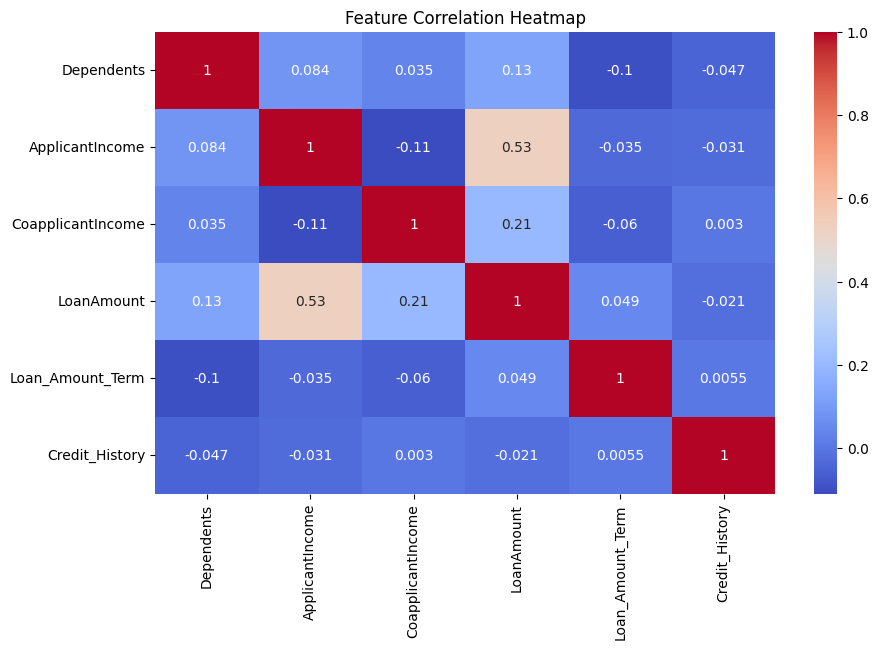

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Outlier Detection Using Boxplot

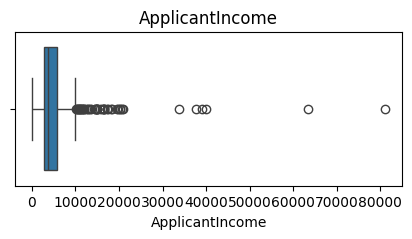

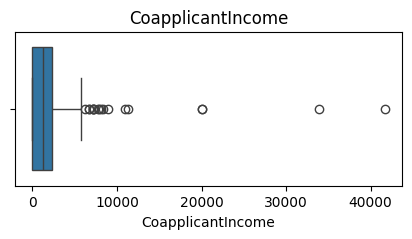

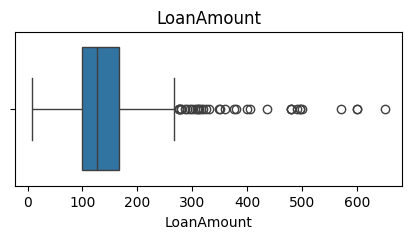

In [14]:
for col in num_cols:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()



Log Transformation of Loan Amount

In [15]:
df['LoanAmount_log'] = np.log1p(df['LoanAmount'])

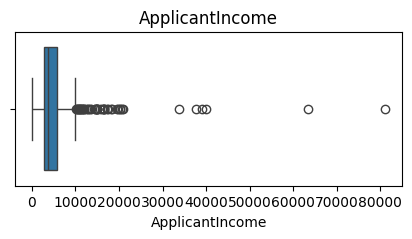

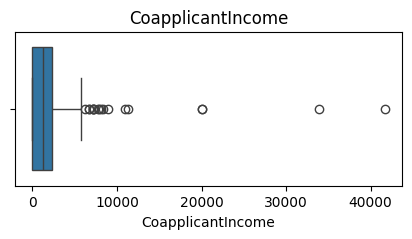

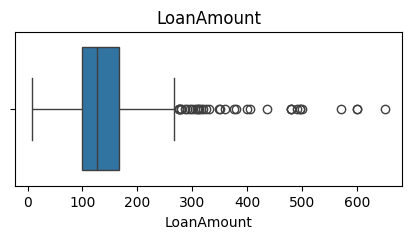

In [16]:
for col in num_cols:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

Missing Value Imputation

In [17]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         598 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     598 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
 13  LoanAmount_log     598 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 65.5+ KB


Drop Irrelevant Column

In [18]:
df.drop("Loan_ID", axis=1, inplace=True)

Feature Engineering – Total Income

In [19]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

Encoding Categorical Variables

In [20]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['Gender','Married','Education','Self_Employed','Loan_Status']
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)


Handle Class Imbalance

In [21]:
from sklearn.utils import resample

majority = df[df["Loan_Status"] == 1]
minority = df[df["Loan_Status"] == 0]

minority_upsampled = resample(
    minority,
    replace=True,
    n_samples=len(majority),
    random_state=42
)

df = pd.concat([majority, minority_upsampled]).sample(frac=1, random_state=42)
df['Loan_Status'].value_counts()


,count
Loan_Status,
0,411
1,411


Train-Test Split

In [22]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)


Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model Training & Evaluation

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [25]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=8),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True)
}

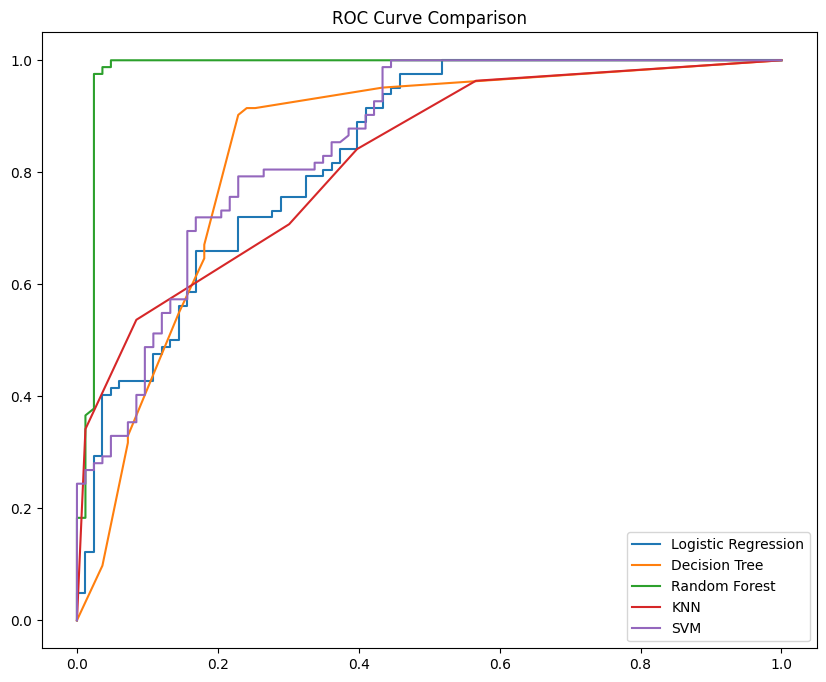

In [26]:
results = []
plt.figure(figsize=(10,8))

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_proba)
    ])

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name}")

plt.legend()
plt.title("ROC Curve Comparison")
plt.show()




In [27]:
results_df = pd.DataFrame(
    results,
    columns=["Model","Accuracy","Precision","Recall","F1","AUC"]
)

results_df.sort_values(by="AUC", ascending=False)

,Model,Accuracy,Precision,Recall,F1,AUC
2,Random Forest,0.969697,0.975309,0.963415,0.969325,0.982148
4,SVM,0.739394,0.682243,0.890244,0.772487,0.851528
1,Decision Tree,0.836364,0.795699,0.902439,0.845714,0.843520
0,Logistic Regression,0.751515,0.681416,0.939024,0.789744,0.833088
3,KNN,0.703030,0.698795,0.707317,0.703030,0.821334


Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [30]:
#Trining score
train_score = best_model.score(X_train, y_train)
print("Training Score:", train_score)

test_score = best_model.score(X_test, y_test)
print("Training Score:", test_score)

Training Score: 1.0
Training Score: 0.9696969696969697


In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

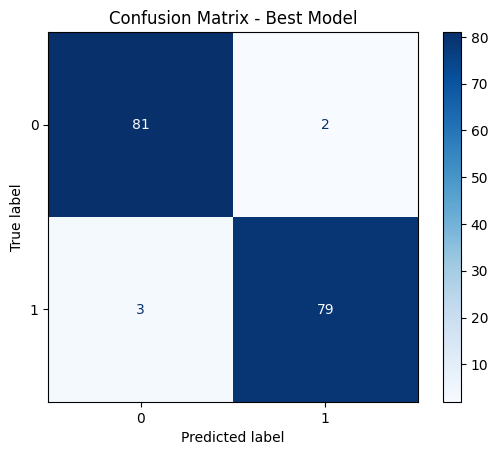

In [34]:
y_pred_best = best_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Best Model")
plt.show()